In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv(r'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print('Shape:', movies.shape) # 数据集规模
print('Movie ids:', movies.movieId.nunique()) # 统计电影id数量
print('Titles:', movies.title.nunique()) # 统计不同电影名称

Shape: (9742, 3)
Movie ids: 9742
Titles: 9737


In [4]:
movies.title.value_counts().sort_values(ascending=False).head(5) #查出对应多个id的5部电影

title
Emma (1996)                               2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
War of the Worlds (2005)                  2
Name: count, dtype: int64

In [5]:
ratings = pd.read_csv(r'ratings.csv')
# 分析评分文件
print('Shape:', ratings.shape)
print('Movie ids:', ratings.movieId.nunique())
print('Number of users:', ratings.userId.nunique())

Shape: (100836, 4)
Movie ids: 9724
Number of users: 610


下面对存在多个id的5部电影数据进行纠正，将评分表中该电影对应id较多的id作为最终id，其他id对应数据删去

In [6]:
# 电影1
movies[movies['title'] == 'Emma (1996)'] # 对应id为838，26958
ratings[(ratings['movieId'] == 838) | (ratings['movieId'] == 26958)]['movieId'].value_counts() # 统计两id的数量，838占29/30
movies = movies[movies['movieId'] != 26958] # 去除多余id数据
# 电影2
movies[movies['title'] == 'Confessions of a Dangerous Mind (2002)'] # 对应id为6003，144606
ratings[(ratings['movieId'] == 144606) | (ratings['movieId'] == 6003)]['movieId'].value_counts() # 统计两id的数量，6003占14/15
movies = movies[movies['movieId'] != 144606] # 去除多余id数据
# 电影3
movies[movies['title'] == 'Eros (2004)'] # 对应id为32600，147002
ratings[(ratings['movieId'] == 32600) | (ratings['movieId'] == 147002)]['movieId'].value_counts() # 统计两id的数量, 数量相同，去除任意一个
movies = movies[movies['movieId'] != 147002] # 去除多余id数据
# 电影4
movies[movies['title'] == 'Saturn 3 (1980)'] # 对应id为2851，168358
ratings[(ratings['movieId'] == 2851) | (ratings['movieId'] == 168358)]['movieId'].value_counts() # 统计两id的数量, 2851占4/5
movies = movies[movies['movieId'] != 168358] # 去除多余id数据
# 电影5
movies[movies['title'] == 'War of the Worlds (2005)'] # 对应id为34048，64997
ratings[(ratings['movieId'] == 34048) | (ratings['movieId'] == 64997)]['movieId'].value_counts() # 统计两id的数量, 34048占50/52
movies = movies[movies['movieId'] != 64997] # 去除多余id数据

In [7]:
print('numbers of movieID:',movies.movieId.nunique())
print('numbers of movietitle:',movies.title.nunique()) # 验证电影id是否与名称一一对应

numbers of movieID: 9737
numbers of movietitle: 9737


In [8]:
# 去除title列和genres列中多余的空格
movies['title'] = movies['title'].str.strip()
movies['genres'] = movies['genres'].str.strip()

# 从电影名中提取年份year作为除类型外的又一电影特征
movies['year'] = movies['title'].str[-5:-1]
movies.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', 'lon ', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'r On', ' Roa', 'atso', 'imal', 'erso',
      

In [9]:
# 发现存在12部电影没有年份信息，人工填补
m = movies.copy()
m['year']=pd.to_numeric(m['year'], errors='coerce')
m[m['year'].isnull()]['title'].value_counts()

title
Babylon 5                                              1
Ready Player One                                       1
Hyena Road                                             1
The Adventures of Sherlock Holmes and Doctor Watson    1
Nocturnal Animals                                      1
Paterson                                               1
Moonlight                                              1
The OA                                                 1
Cosmos                                                 1
Maria Bamford: Old Baby                                1
Generation Iron 2                                      1
Black Mirror                                           1
Name: count, dtype: int64

In [10]:
movies['year'] = movies['year'].replace('irro',2011)
movies['year'] = movies['year'].replace('atso',2011)
movies['year'] = movies['year'].replace(' Bab',2017)
movies['year'] = movies['year'].replace('ron ',2017)
movies['year'] = movies['year'].replace('r On',2018)
movies['year'] = movies['year'].replace('lon ',1994)
movies['year'] = movies['year'].replace('imal',2016)
movies['year'] = movies['year'].replace('osmo',2019)
movies['year'] = movies['year'].replace('he O',2016)
movies['year'] = movies['year'].replace(' Roa',2015)
movies['year'] = movies['year'].replace('ligh',2016)
movies['year'] = movies['year'].replace('erso',2016)

In [11]:
# 确认genres是否完整，如不完整根据同名电影补全
movies[movies['genres']=='(no genres listed)'].drop_duplicates('movieId')['movieId'].values

array([114335, 122888, 122896, 129250, 132084, 134861, 141131, 141866,
       142456, 143410, 147250, 149330, 152037, 155589, 156605, 159161,
       159779, 161008, 165489, 166024, 167570, 169034, 171495, 171631,
       171749, 171891, 172497, 172591, 173535, 174403, 176601, 181413,
       181719, 182727], dtype=int64)

In [12]:
movies.loc[movies['movieId']==122896,"genres"] = 'Adventure|Action|Fantasy'
movies.loc[movies['movieId']==114335,"genres"] = 'Fantasy'
movies.loc[movies['movieId']==174403,"genres"] = 'Documentary|Biography'
movies.loc[movies['movieId']==172591,"genres"] = 'Crime|Drama|Thriller'
movies.loc[movies['movieId']==176601,"genres"] = 'Sci-Fi|Fantasy'
movies.loc[movies['movieId']==155589,"genres"] = 'Comedy'
movies.loc[movies['movieId']==147250,"genres"] = 'Crime|Mystery|Romance'
movies.loc[movies['movieId']==171749,"genres"] = 'Animation|Crime|Drama'
movies.loc[movies['movieId']==173535,"genres"] = 'Crime|Drama|Mystery'
movies.loc[movies['movieId']==134861,"genres"] = 'Comedy'
movies.loc[movies['movieId']==159161,"genres"] = 'Comedy'
movies.loc[movies['movieId']==171631,"genres"] = 'Documentary|Comedy'
movies.loc[movies['movieId']==171891,"genres"] = 'Documentary'
movies.loc[movies['movieId']==142456,"genres"] = 'Comedy|Fantasy'
movies.loc[movies['movieId']==181413,"genres"] = 'Documentary'
movies.loc[movies['movieId']==159779,"genres"] = 'Comedy|Fantasy'
movies.loc[movies['movieId']==169034,"genres"] = 'Musical'
movies.loc[movies['movieId']==171495,"genres"] = 'Sci-Fi'
movies.loc[movies['movieId']==172497,"genres"] = 'Action|Sci-Fi'
movies.loc[movies['movieId']==166024,"genres"] = 'Drama|Music'
movies.loc[movies['movieId']==167570,"genres"] = 'Drama|Fantasy|Mystery'
movies.loc[movies['movieId']==129250,"genres"] = 'Comedy'
movies.loc[movies['movieId']==143410,"genres"] = 'Action|Drama|War'
movies.loc[movies['movieId']==149330,"genres"] = 'Animation|Sci-Fi'
movies.loc[movies['movieId']==182727,"genres"] = 'Musical'
movies.loc[movies['movieId']==152037,"genres"] = 'Romance|Musical'
movies.loc[movies['movieId']==165489,"genres"] = 'Drama|Animation|History'
movies.loc[movies['movieId']==141866,"genres"] = 'Horror|Music|Thriller'
movies.loc[movies['movieId']==122888,"genres"] = 'Action|Adventure|Drama'
movies.loc[movies['movieId']==156605,"genres"] = 'Comedy|Drama|Romance'
movies.loc[movies['movieId']==141131,"genres"] = 'Action|Mystery|Sci-Fi'
movies.loc[movies['movieId']==181719,"genres"] = 'Biography|Drama'
movies.loc[movies['movieId']==132084,"genres"] = 'Drama|Romance'
movies.loc[movies['movieId']==161008,"genres"] = 'Drama|Music|Romance'

In [13]:
# 将geners中的同义词统一，主要是'musical'和'music'
movies['genres'] = movies['genres'].str.replace('Musical','Music')
# 将year转换为数字
movies['year'] = movies['year'].astype(int)
movies['title'] = movies['title'].astype(str)
# 再次确认数据框信息
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9737 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9737 non-null   int64 
 1   title    9737 non-null   object
 2   genres   9737 non-null   object
 3   year     9737 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 342.3+ KB


In [14]:
def add_index_column(param_df, column_name):
    values = list(param_df[column_name].unique())
    value_index_dict = {value:idx for idx,value in enumerate(values)}
    param_df[f"{column_name}_idx"] = param_df[column_name].map(value_index_dict)
add_index_column(movies, "year")

In [15]:
#电影类型转数字字典
genres_set = set()
for val in movies['genres'].str.split('|'):
    genres_set.update(val)
for genre in genres_set:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)
movies.sample(frac=1).head(3)

,movieId,title,genres,year,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary
2818,3766,Missing in Action (1984),Action|War,1984,63,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2343,3101,Fatal Attraction (1987),Drama|Thriller,1987,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2652,3550,The Hunger (1983),Horror,1983,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
idset = set(movies['movieId'])-set(ratings['movieId'])
for id in idset:
    movies = movies[movies['movieId'] != id]
movies.shape

(9719, 26)

In [17]:
ridset = set(ratings['movieId'])-set(movies['movieId'])
for id in ridset:
    ratings = ratings[ratings['movieId'] != id]
len(set(ratings['movieId']))

9719

In [18]:
columns_to_remove = ['title','genres','year'] # 需要删除的列名列表
movies_final = movies.drop(columns=columns_to_remove)
movies_info = movies.iloc[:,0:4]
movies_final.to_csv('movies_final.csv', index=False)
movies_info.to_csv('movies_info.csv', index=False) # 存储两类数据便于后续分析

In [19]:
movies_final.sample(frac=1).head(3)

,movieId,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary
570,697,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9293,158783,102,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
5327,8860,86,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


#### 1. 基于用户的协同过滤

In [20]:
data = ratings.drop('timestamp',axis = 1)
data.sample(frac=1).head(3)

,userId,movieId,rating
34820,233,4995,3.5
88868,573,8641,5.0
57417,380,5055,3.0


In [21]:
data['rating'].describe()

count    100830.000000
mean          3.501567
std           1.042548
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [22]:
mask_pre = data.copy()
mask_eva = data.copy()
mask_pre['rating'] = mask_pre['rating'].apply(lambda x: 0 if x>=1 else 1)
mask_eva['rating'] = mask_eva['rating'].apply(lambda x: 1 if x>=1 else 0)
# maske_pre用于预测未评分用户的评分，因此，已评分部分为0，未评分部分为1
mask_pre = mask_pre.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(1)
# maske_eva用于针对已评分数据衡量评分预测的准确度，因此，已评分部分为1，未评分部分为0
mask_eva = mask_eva.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)
print('mask_pre.shape:',mask_pre.shape)
print('mask_eva.shape:',mask_eva.shape)

mask_pre.shape: (610, 9719)
mask_eva.shape: (610, 9719)


In [23]:
mask_pre.sample(frac=1).head(3)

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
286,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
260,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
342,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
df_movie_user = data.pivot(index='userId', columns='movieId', values='rating')
df_movie_user.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 对每个用户，减去其打分的平均值，减少用户打分基准差异
mean = np.nanmean(df_movie_user, axis=1) 
print(mean.shape) # 按行求均值，返回1行m列
df_subtracted = (df_movie_user.T - mean).T
df_subtracted.head(3)

(610,)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633621,NaN,NaN,0.633621,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.935897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
from sklearn.metrics.pairwise import pairwise_distances

# 利用相似矩阵计算用户相似度
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[ 1.00000000e+00  1.26451574e-03  5.52577176e-04 ...  7.52238457e-02
  -2.57125541e-02  1.09323166e-02]
 [ 1.26451574e-03  1.00000000e+00  0.00000000e+00 ... -6.00082818e-03
  -6.00909967e-02  2.49992083e-02]
 [ 5.52577176e-04  0.00000000e+00  1.00000000e+00 ... -1.30006374e-02
   0.00000000e+00  1.95499646e-02]
 ...
 [ 7.52238457e-02 -6.00082818e-03 -1.30006374e-02 ...  1.00000000e+00
   5.07144903e-02  5.44538770e-02]
 [-2.57125541e-02 -6.00909967e-02  0.00000000e+00 ...  5.07144903e-02
   1.00000000e+00 -1.24714266e-02]
 [ 1.09323166e-02  2.49992083e-02  1.95499646e-02 ...  5.44538770e-02
  -1.24714266e-02  1.00000000e+00]]
(610, 610)


In [27]:
np.fill_diagonal(user_correlation, 0) # 将对角线上元素设为0，防止用自己的评分预测自己的评分
user_correlation[user_correlation<0] = 0 # 负相关的用户没有参考价值
user_correlation

array([[0.        , 0.00126452, 0.00055258, ..., 0.07522385, 0.        ,
        0.01093232],
       [0.00126452, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02499921],
       [0.00055258, 0.        , 0.        , ..., 0.        , 0.        ,
        0.01954996],
       ...,
       [0.07522385, 0.        , 0.        , ..., 0.        , 0.05071449,
        0.05445388],
       [0.        , 0.        , 0.        , ..., 0.05071449, 0.        ,
        0.        ],
       [0.01093232, 0.02499921, 0.01954996, ..., 0.05445388, 0.        ,
        0.        ]])

In [84]:
number = np.dot(user_correlation,mask_eva)
pred_ratings = np.dot(user_correlation, df_subtracted.fillna(0)) # 610x610 . 610x9719 = 610x9719
pred_ratings = np.divide(pred_ratings, number)
mask1 = mask_pre.copy()
mask1[mask1==0]=1 # 创建一张全是1的mask1
final_ratings = np.multiply(pred_ratings, mask1).fillna(0)#无相关用户可供参考时会出现null值，后续用该用户对其他电影的平均打分填充
final_ratings = (final_ratings.T + mean).T
final_ratings[final_ratings<0] = 0
final_ratings.head() #得到最终评分矩阵

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.676238,4.128151,4.169136,3.047603,3.766781,4.639927,3.874679,3.424228,3.334707,4.272392,4.369555,3.265098,4.211332,4.450122,3.652047,4.900839,4.560698,4.581203,3.814290,3.765346,4.497163,3.941445,3.758480,3.915871,4.506071,4.480130,3.563869,4.818017,5.004127,2.764080,3.909799,4.828875,4.505173,4.575612,3.643857,4.041385,5.527094,4.819302,3.600025,4.301627,3.229913,4.186758,3.319157,4.925407,3.787039,3.547521,5.180443,4.286856,5.660497,2.789721,...,3.661663,4.366379,4.366379,3.474422,5.053248,4.053248,4.871245,3.951236,4.784412,3.053248,5.209690,3.669917,4.053248,3.693850,4.053248,3.553248,2.597440,4.578074,4.416375,4.366379,4.366379,4.806737,4.366379,5.275654,5.053248,4.366379,3.930482,4.430482,4.121281,4.366379,1.286669,4.366379,5.085734,2.930482,5.430482,2.430482,2.930482,2.430482,2.430482,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.738403
2,4.233724,3.834182,3.074837,3.198636,3.618571,4.351673,3.167975,4.174639,3.308276,4.077506,3.835329,2.461751,3.740377,3.948276,3.770192,4.376458,4.086565,3.568169,3.335736,3.230139,3.580400,3.893265,3.154035,3.206105,3.462230,3.731708,4.547766,4.285151,4.606221,3.948276,4.120915,4.065775,3.967740,3.836257,4.100905,4.041193,3.948276,4.552624,2.973230,2.159814,3.612835,4.670826,3.336066,4.595952,3.733430,3.948276,4.033844,3.970849,3.948276,3.948276,...,0.953136,0.000000,3.948276,3.948276,4.635145,3.635145,4.453142,2.110414,3.948276,2.635145,3.948276,3.251813,3.635145,3.635145,3.635145,3.135145,2.659342,4.371314,3.884761,3.948276,3.948276,4.415540,3.948276,3.948276,4.635145,3.948276,3.948276,3.948276,4.243052,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,4.743052,3.743052,3.243052,4.243052,4.243052,3.743052,4.243052,3.743052,3.743052,3.743052,3.948276
3,2.837057,2.452553,1.873866,2.004644,2.287442,2.903128,1.868608,1.788681,1.293847,2.793519,2.255109,1.923489,2.147829,3.137311,3.385564,2.744615,2.626268,2.437192,1.810068,2.131220,2.375244,2.440165,1.850404,1.804305,2.254835,2.790060,2.485427,2.955701,3.010019,0.157363,1.694913,2.782802,2.575429,2.447316,2.435897,2.361123,2.435897,3.095247,2.793847,2.935666,2.178503,2.649797,0.792589,2.839979,1.920846,2.435897,3.076892,1.776196,3.927944,2.942267,...,1.532216,2.435897,3.029304,2.435897,2.435897,2.435897,2.940764,3.239435,2.435897,2.435897,2.435897,1.739435,2.435897,2.435897,2.435897,2.435897,2.522854,2.360499,2.944405,4.029304,3.529304,2.809225,2.435897,3.345172,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,0.000000,1.529304,3.155252,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.875921,3.476659,3.215332,2.490186,3.161297,3.806089,3.014759,3.125505,3.077812,3.407453,3.480434,2.272515,3.434810,3.772791,3.190535,3.737989,3.938842,3.834717,2.590863,2.521333,3.600278,3.366203,3.174067,3.182288,3.691972,3.673716,3.211391,4.147168,3.854660,4.047602,3.500135,3.639078,3.754793,3.731881,2.541490,3.344739,4.473701,3.923932,2.845999,3.495262,2.279166,3.722338,2.461717,3.623533,3.539588,2.736697,4.282042,3.312371,4.907975,2.711194,...,3.242424,3.555556,4.148962,2.663599,4.242424,3.242424,3.555556,2.907611,3.555556,2.242424,3.555556,2.859093,3.242424,2.655740,3.242424,2.960125,3.642512,4.347083,3.358842,5.148962,4.648962,3.555556,3.555556,4.464830

In [85]:
no_rate_pred = np.multiply(final_ratings, mask_pre)
no_rate_pred.head() # 对未评分用户的预测，0表示用户已对该电影评分，因此无预测

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,4.128151,0.000000,3.047603,3.766781,0.000000,3.874679,3.424228,3.334707,4.272392,4.369555,3.265098,4.211332,4.450122,3.652047,4.900839,4.560698,4.581203,3.814290,3.765346,4.497163,3.941445,3.758480,3.915871,4.506071,4.480130,3.563869,4.818017,5.004127,2.764080,3.909799,4.828875,4.505173,4.575612,3.643857,4.041385,5.527094,4.819302,3.600025,4.301627,3.229913,4.186758,3.319157,0.000000,3.787039,3.547521,0.000000,4.286856,5.660497,2.789721,...,3.661663,4.366379,4.366379,3.474422,5.053248,4.053248,4.871245,3.951236,4.784412,3.053248,5.209690,3.669917,4.053248,3.693850,4.053248,3.553248,2.597440,4.578074,4.416375,4.366379,4.366379,4.806737,4.366379,5.275654,5.053248,4.366379,3.930482,4.430482,4.121281,4.366379,1.286669,4.366379,5.085734,2.930482,5.430482,2.430482,2.930482,2.430482,2.430482,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.738403
2,4.233724,3.834182,3.074837,3.198636,3.618571,4.351673,3.167975,4.174639,3.308276,4.077506,3.835329,2.461751,3.740377,3.948276,3.770192,4.376458,4.086565,3.568169,3.335736,3.230139,3.580400,3.893265,3.154035,3.206105,3.462230,3.731708,4.547766,4.285151,4.606221,3.948276,4.120915,4.065775,3.967740,3.836257,4.100905,4.041193,3.948276,4.552624,2.973230,2.159814,3.612835,4.670826,3.336066,4.595952,3.733430,3.948276,4.033844,3.970849,3.948276,3.948276,...,0.953136,0.000000,3.948276,3.948276,4.635145,3.635145,4.453142,2.110414,3.948276,2.635145,3.948276,3.251813,3.635145,3.635145,3.635145,3.135145,2.659342,4.371314,3.884761,3.948276,3.948276,4.415540,3.948276,3.948276,4.635145,3.948276,3.948276,3.948276,4.243052,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,4.743052,3.743052,3.243052,4.243052,4.243052,3.743052,4.243052,3.743052,3.743052,3.743052,3.948276
3,2.837057,2.452553,1.873866,2.004644,2.287442,2.903128,1.868608,1.788681,1.293847,2.793519,2.255109,1.923489,2.147829,3.137311,3.385564,2.744615,2.626268,2.437192,1.810068,2.131220,2.375244,2.440165,1.850404,1.804305,2.254835,2.790060,2.485427,2.955701,3.010019,0.157363,1.694913,2.782802,2.575429,2.447316,2.435897,2.361123,2.435897,3.095247,2.793847,2.935666,2.178503,2.649797,0.792589,2.839979,1.920846,2.435897,3.076892,1.776196,3.927944,2.942267,...,1.532216,2.435897,3.029304,2.435897,2.435897,2.435897,2.940764,3.239435,2.435897,2.435897,2.435897,1.739435,2.435897,2.435897,2.435897,2.435897,2.522854,2.360499,2.944405,4.029304,3.529304,2.809225,2.435897,3.345172,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,0.000000,1.529304,3.155252,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.875921,3.476659,3.215332,2.490186,3.161297,3.806089,3.014759,3.125505,3.077812,3.407453,3.480434,2.272515,3.434810,3.772791,3.190535,3.737989,3.938842,3.834717,2.590863,2.521333,0.000000,3.366203,3.174067,3.182288,3.691972,3.673716,3.211391,4.147168,3.854660,4.047602,3.500135,0.000000,3.754793,3.731881,2.541490,3.344739,4.473701,3.923932,2.845999,3.495262,2.279166,0.000000,2.461717,0.000000,3.539588,2.736697,4.282042,0.000000,4.907975,2.711194,...,3.242424,3.555556,4.148962,2.663599,4.242424,3.242424,3.555556,2.907611,3.555556,2.242424,3.555556,2.859093,3.242424,2.655740,3.242424,2.960125,3.642512,4.347083,3.358842,5.148962,4.648962,3.555556,3.555556,4.464830

In [86]:
rate_eva = np.multiply(final_ratings, mask_eva)
rate_eva.head() # 基于其他信息对已评分用户的预测（预测中不考虑用户自己的评分）

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.676238,0.0,4.169136,0.0,0.0,4.639927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.925407,0.0,0.0,5.180443,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.600278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.639078,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.722338,0.0,3.623533,0.0,0.0,0.000000,3.312371,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.211985,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.658459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.090166,3.78186,0.0,3.083759,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,4.519298,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# 计算预测平均绝对误差
def MAE(test, pred):
    X = pred[pred>0]
    total_non_nan = np.count_nonzero(~np.isnan(X))
    mae = sum(np.sum(abs((test - X ).fillna(0))))/total_non_nan
    return mae

print('MAE:', MAE(df_movie_user,rate_eva))

MAE: 0.5994882402815325


因此，用该算法预测用户评分的平均绝对误差为0.599.

In [88]:
no_rate_pred.to_csv('no_rate_pred1.csv', index=False)
rate_eva.to_csv('rate_eva1.csv', index=False)

#### 2. 基于电影的协同过滤

In [54]:
df_movie_user2 = df_movie_user.T
mean2 = np.nanmean(df_movie_user2, axis=1) # 计算非NAN的均值
print(mean2.shape)
df_subtracted2 = (df_movie_user2.T-mean2).T
df_subtracted2.head()

(9719,)


userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.079070,NaN,NaN,NaN,0.07907,NaN,0.57907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.42093,NaN,0.57907,-0.420930,0.079070,NaN,-0.420930,NaN,NaN,NaN,NaN,NaN,-0.920930,NaN,NaN,NaN,1.079070,-0.920930,-0.92093,NaN,NaN,NaN,NaN,NaN,NaN,1.07907,NaN,NaN,1.079070,-0.920930,0.079070,1.07907,NaN,NaN,NaN,-0.92093,...,0.079070,0.57907,NaN,NaN,NaN,NaN,-0.42093,NaN,NaN,0.079070,NaN,0.07907,1.079070,NaN,NaN,NaN,NaN,NaN,0.07907,-0.92093,NaN,NaN,NaN,1.07907,NaN,NaN,1.07907,NaN,NaN,0.079070,NaN,NaN,NaN,NaN,NaN,0.07907,0.07907,NaN,-0.920930,-1.420930,0.07907,NaN,0.07907,-0.920930,0.079070,-1.42093,0.07907,-1.420930,-0.92093,1.07907
2,NaN,NaN,NaN,NaN,NaN,0.568182,NaN,0.568182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.431818,-0.431818,-0.431818,0.068182,NaN,NaN,NaN,NaN,NaN,0.568182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.568182,NaN,-0.931818,NaN,NaN,0.568182,NaN,NaN,NaN,0.068182,NaN,NaN,1.068182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568182,NaN,NaN,NaN,-0.931818,NaN,0.568182,NaN,0.568182,NaN,NaN,NaN,NaN,-0.931818,0.568182,NaN,0.568182,NaN,1.568182,0.068182,NaN,NaN,-1.431818,NaN,NaN
3,0.740385,NaN,NaN,NaN,NaN,1.740385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740385,1.740385,-0.259615,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259615,NaN,-0.259615,NaN,NaN,NaN,0.740385,NaN,NaN,NaN,NaN,-1.759615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.259615,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.642857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.928571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.928571,NaN,-0.071429,NaN,NaN,NaN,NaN,NaN,...,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.571429,NaN,NaN,NaN,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# 利用相似矩阵计算用户相似度
movie_correlation = 1 - pairwise_distances(df_subtracted2.fillna(0), metric='cosine')
movie_correlation[np.isnan(movie_correlation)] = 0
np.fill_diagonal(movie_correlation, 0) # 将对角线上元素设为0，防止用自己的评分预测自己的评分
movie_correlation[movie_correlation<0] = 0 # 负相关的电影没有参考价值
movie_correlation
print(movie_correlation)
print(movie_correlation.shape)

[[0.         0.13964885 0.11384957 ... 0.         0.         0.        ]
 [0.13964885 0.         0.18730254 ... 0.         0.         0.        ]
 [0.11384957 0.18730254 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(9719, 9719)


In [89]:
# 计算最终评分
mask_eva2 = df_subtracted2.fillna(0)
mask_eva2[mask_eva2!=0] = 1
number2 = np.dot(movie_correlation,mask_eva2) 

pred_ratings2 = np.dot(movie_correlation, df_subtracted2.fillna(0))
pred_ratings2 = np.divide(pred_ratings2, number2)
final_ratings2 = np.multiply(pred_ratings2, mask1.T).fillna(0
final_ratings2 = (final_ratings2.T + mean2).T
final_ratings2[final_ratings2<0] = 0
final_ratings2.head() #得到最终评分矩阵

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.666776,3.870387,1.922936,3.715583,3.924729,4.288921,3.950104,3.922355,4.161871,3.657562,4.191438,5.039093,4.323739,3.753536,3.341211,3.639774,4.209087,3.979867,3.399918,4.263731,3.687127,2.916542,3.547540,3.906632,4.737728,3.600319,3.888731,3.327821,4.161680,4.679263,4.242692,4.061646,3.946889,3.862850,4.472188,2.910805,4.285389,3.606801,4.037594,4.467157,3.455405,4.118787,5.283594,3.788151,4.360265,4.651333,3.273301,4.472068,4.229418,2.967040,...,3.844902,4.412944,3.918206,4.105974,3.875646,3.848004,2.846244,4.299878,4.282500,3.688017,3.723575,4.205085,4.678569,4.492894,4.007236,3.606366,3.877192,4.695634,4.537406,3.742680,4.338352,4.108784,3.773424,4.854610,4.427525,4.610327,4.503968,3.610478,4.534049,3.781699,4.045302,4.367114,3.397135,4.768501,4.396657,3.820981,4.373622,2.906579,3.229363,3.249576,4.419636,3.856680,3.901195,4.051560,3.816058,3.805374,4.074415,3.424890,3.577047,4.394657
2,4.205110,3.553173,2.349806,3.238866,3.270090,3.985067,3.351397,3.426720,3.584393,3.421983,3.716126,4.589290,3.815026,3.395987,3.222966,3.228219,3.742873,3.476530,2.839715,3.502391,3.481946,2.367001,3.104339,3.402435,4.270931,3.077016,3.609269,2.838957,3.793651,4.166084,3.730009,3.487430,3.624495,3.262768,4.154146,2.455046,3.867258,3.113028,3.658923,3.710636,2.886633,3.732510,4.749145,3.478819,3.879320,4.218432,2.894274,4.035505,3.730757,2.494372,...,3.331659,3.934890,3.372500,3.763555,3.356964,3.506686,2.280550,3.815223,4.056951,3.202238,3.244029,3.716283,4.185658,3.911829,3.682657,3.342075,3.415982,4.443586,4.137032,3.521493,3.833663,3.620880,3.350016,4.375008,3.885614,4.207851,3.920420,2.971795,3.998108,3.148929,3.465712,3.880478,2.792031,4.587373,4.289879,3.316510,3.836654,3.650896,2.732477,3.188383,3.934959,3.430325,3.326260,3.749659,3.399259,3.467389,3.680218,3.060077,3.114898,3.737367
3,4.204530,3.144062,1.446444,3.141150,3.160044,3.837945,3.073202,3.242821,3.270040,3.022035,3.687071,4.133094,3.493793,3.294218,2.983660,3.024617,3.517362,3.315027,2.679784,3.597863,3.253720,2.483650,2.864252,3.225046,4.088682,2.899172,3.399950,2.657714,3.618430,3.759898,3.569892,3.370357,3.408902,2.814198,4.149396,2.358354,3.753618,3.097601,3.410763,3.577465,2.692867,3.735040,4.769431,3.533702,3.609468,3.923884,2.787226,3.976192,3.513886,2.469025,...,3.236387,3.700226,3.323557,3.338277,3.238448,3.253967,2.321826,3.768504,3.649864,3.021498,3.177020,3.576482,3.868491,3.845752,3.644023,3.297795,3.146391,4.270326,3.858383,3.227095,3.665526,3.356814,3.271475,4.126966,3.834040,3.815672,3.586365,2.934976,3.883792,3.054959,3.198996,3.571372,2.767731,4.418855,3.738057,3.141506,3.681005,2.878805,2.451650,2.916814,3.709059,3.117058,3.191778,3.516724,3.102957,3.317074,3.688145,2.690628,3.007610,3.632296
4,3.093672,1.626012,0.000000,2.296357,1.919524,3.035143,2.155268,2.128553,2.383658,1.762264,3.014357,3.282194,2.448688,2.793548,2.296195,2.008586,2.743248,2.351815,1.724119,2.696890,2.469685,1.232805,2.024692,2.505911,3.137792,1.942031,2.454670,1.866926,2.756713,2.765602,2.553344,2.746766,2.666932,1.888104,2.859177,1.610282,2.681846,2.073209,2.432245,2.721636,1.943158,2.602687,3.497377,2.653439,2.807931,2.914736,1.882829,2.982422,2.406198,1.433540,...,2.189667,2.802499,2.425174,2.260371,2.393201,2.466334,1.366139,3.016434,2.921251,2.165017,2.739787,2.642178,2.888679,2.868523,2.191048,2.337673,2.159053,2.982067,3.026788,2.299976,2.848316,2.204848,2.371525,3.407367,3.120613,2.913646,2.849222,2.308679,2.932654,2.194721,2.343382,2.664577,2.034593,3.364422,2.944810,2.156520,2.904354,0.668321,1.641804,1.000880,2.687

In [90]:
no_rate_pred2 = np.multiply(final_ratings2, mask_pre.T)
no_rate_pred2.head() # 对未评分用户的预测，0表示用户已对该电影评分，因此无预测

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.870387,1.922936,3.715583,0.000000,4.288921,0.000000,3.922355,4.161871,3.657562,4.191438,5.039093,4.323739,3.753536,0.000000,3.639774,0.000000,0.000000,0.000000,4.263731,0.000000,2.916542,3.547540,3.906632,4.737728,3.600319,0.000000,3.327821,4.161680,4.679263,0.000000,0.000000,0.000000,3.862850,4.472188,2.910805,4.285389,3.606801,4.037594,0.000000,3.455405,4.118787,0.000000,0.000000,0.000000,0.000000,3.273301,4.472068,4.229418,0.000000,...,0.000000,0.000000,3.918206,4.105974,3.875646,3.848004,0.000000,4.299878,4.282500,0.000000,3.723575,0.000000,0.000000,4.492894,4.007236,3.606366,3.877192,4.695634,0.000000,0.000000,4.338352,4.108784,3.773424,0.000000,4.427525,4.610327,0.000000,3.610478,4.534049,0.000000,4.045302,4.367114,3.397135,4.768501,4.396657,0.000000,0.000000,2.906579,0.000000,0.000000,0.000000,3.856680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.205110,3.553173,2.349806,3.238866,3.270090,0.000000,3.351397,0.000000,3.584393,3.421983,3.716126,4.589290,3.815026,3.395987,3.222966,3.228219,3.742873,0.000000,0.000000,0.000000,0.000000,2.367001,3.104339,3.402435,4.270931,3.077016,0.000000,2.838957,3.793651,4.166084,3.730009,3.487430,3.624495,3.262768,4.154146,2.455046,3.867258,3.113028,3.658923,3.710636,2.886633,3.732510,4.749145,3.478819,3.879320,4.218432,2.894274,4.035505,3.730757,2.494372,...,0.000000,3.934890,0.000000,3.763555,3.356964,0.000000,2.280550,3.815223,4.056951,0.000000,3.244029,3.716283,0.000000,3.911829,3.682657,3.342075,3.415982,4.443586,4.137032,3.521493,3.833663,3.620880,3.350016,4.375008,3.885614,0.000000,3.920420,2.971795,3.998108,0.000000,3.465712,0.000000,2.792031,0.000000,4.289879,3.316510,3.836654,3.650896,0.000000,0.000000,3.934959,0.000000,3.326260,0.000000,0.000000,3.467389,3.680218,0.000000,3.114898,3.737367
3,0.000000,3.144062,1.446444,3.141150,3.160044,0.000000,3.073202,3.242821,3.270040,3.022035,3.687071,4.133094,3.493793,3.294218,2.983660,3.024617,3.517362,3.315027,0.000000,3.597863,3.253720,2.483650,2.864252,3.225046,4.088682,2.899172,3.399950,2.657714,3.618430,3.759898,3.569892,0.000000,3.408902,2.814198,4.149396,2.358354,3.753618,3.097601,3.410763,3.577465,2.692867,0.000000,0.000000,0.000000,3.609468,3.923884,2.787226,3.976192,3.513886,2.469025,...,3.236387,3.700226,3.323557,3.338277,3.238448,3.253967,2.321826,3.768504,3.649864,3.021498,3.177020,3.576482,3.868491,3.845752,3.644023,3.297795,3.146391,4.270326,3.858383,3.227095,3.665526,3.356814,3.271475,4.126966,3.834040,3.815672,3.586365,0.000000,3.883792,0.000000,3.198996,3.571372,2.767731,0.000000,3.738057,3.141506,3.681005,2.878805,0.000000,2.916814,3.709059,3.117058,3.191778,3.516724,3.102957,3.317074,3.688145,0.000000,3.007610,3.632296
4,3.093672,1.626012,0.000000,2.296357,1.919524,0.000000,2.155268,2.128553,2.383658,1.762264,3.014357,3.282194,2.448688,0.000000,2.296195,2.008586,2.743248,2.351815,1.724119,2.696890,2.469685,1.232805,2.024692,2.505911,3.137792,1.942031,2.454670,1.866926,2.756713,2.765602,2.553344,2.746766,2.666932,1.888104,2.859177,1.610282,2.681846,2.073209,2.432245,2.721636,1.943158,2.602687,3.497377,2.653439,2.807931,2.914736,1.882829,2.982422,2.406198,1.433540,...,2.189667,2.802499,2.425174,2.260371,2.393201,2.466334,1.366139,3.016434,2.921251,2.165017,2.739787,2.642178,2.888679,2.868523,2.191048,2.337673,2.159053,2.982067,3.026788,2.299976,2.848316,2.204848,2.371525,3.407367,3.120613,2.913646,2.849222,2.308679,2.932654,2.194721,2.343382,2.664577,2.034593,3.364422,2.944810,2.156520,2.904354,0.668321,1.641804,0.000000,2.687

In [91]:
rate_eva2 = np.multiply(final_ratings2, mask_eva2)
rate_eva2.head() # 基于其他信息对已评分用户的预测（预测中不考虑用户自己的评分）

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.666776,0.0,0.0,0.0,3.924729,0.000000,3.950104,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,3.341211,0.0,4.209087,3.979867,3.399918,0.000000,3.687127,0.0,0.0,0.0,0.0,0.0,3.888731,0.0,0.0,0.0,4.242692,4.061646,3.946889,0.0,0.0,0.0,0.0,0.0,0.0,4.467157,0.0,0.00000,5.283594,3.788151,4.360265,4.651333,0.0,0.0,0.0,2.96704,...,3.844902,4.412944,0.0000,0.0,0.0,0.000000,2.846244,0.0,0.0,3.688017,0.0,4.205085,4.678569,0.0,0.0,0.0,0.0,0.0,4.537406,3.74268,0.0,0.0,0.0,4.85461,0.0,0.000000,4.503968,0.000000,0.0,3.781699,0.0,0.000000,0.0,0.000000,0.0,3.820981,4.373622,0.0,3.229363,3.249576,4.419636,0.000000,3.901195,4.051560,3.816058,3.805374,4.074415,3.424890,3.577047,4.394657
2,0.000000,0.0,0.0,0.0,0.000000,3.985067,0.000000,3.42672,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3.476530,2.839715,3.502391,3.481946,0.0,0.0,0.0,0.0,0.0,3.609269,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,3.331659,0.000000,3.3725,0.0,0.0,3.506686,0.000000,0.0,0.0,3.202238,0.0,0.000000,4.185658,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,4.207851,0.000000,0.000000,0.0,3.148929,0.0,3.880478,0.0,4.587373,0.0,0.000000,0.000000,0.0,2.732477,3.188383,0.000000,3.430325,0.000000,3.749659,3.399259,0.000000,0.000000,3.060077,0.000000,0.000000
3,4.204530,0.0,0.0,0.0,0.000000,3.837945,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.679784,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.370357,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.73504,4.769431,3.533702,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,2.934976,0.0,3.054959,0.0,0.000000,0.0,4.418855,0.0,0.000000,0.000000,0.0,2.451650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.690628,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,3.035143,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,2.793548,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.0,0.0,0.000000,3.784014,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.558576,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,4.649995,0.000000,3.590573,0.000000,0.0,0.0,0.0,0.00000,...,2.941822,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,2.701866,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.416888,0.000000,0.000000,0.000000,3.379183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [108]:
print('MAE:', MAE(df_movie_user2, rate_eva2))

MAE: 0.4356260536038323


In [129]:
no_rate_pred2.to_csv('no_rate_pred2.csv', index=False)
rate_eva2.to_csv('rate_eva2.csv', index=False)

#### 3. 加入电影类型，年份等信息

In [97]:
movies_final = pd.read_csv('movies_final.csv')
movies_final.sort_values('movieId')
movies_final.head()

,movieId,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
movie_correlation2 = 1 - pairwise_distances(movies_final.iloc[:,1:], metric='cosine')
movie_correlation2[np.isnan(movie_correlation2)] = 0
np.fill_diagonal(movie_correlation2, 0) # 将对角线上元素设为0，防止用自己的评分预测自己的评分
movie_correlation2[movie_correlation2<0] = 0 # 负相关的电影没有参考价值
movie_correlation2
print(movie_correlation2)
print(movie_correlation2.shape)

[[0.         0.77459667 0.31622777 ... 0.         0.00429973 0.03713907]
 [0.77459667 0.         0.         ... 0.         0.         0.        ]
 [0.31622777 0.         0.         ... 0.         0.         0.05872202]
 ...
 [0.         0.         0.         ... 0.         0.99986044 0.99649879]
 [0.00429973 0.         0.         ... 0.99986044 0.         0.99645363]
 [0.03713907 0.         0.05872202 ... 0.99649879 0.99645363 0.        ]]
(9719, 9719)


In [117]:
mae={}
lp = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99]
for p in lp:
    R = p * movie_correlation +(1-p) * movie_correlation2
    number3 = np.dot(R, mask_eva2)
    
    pred_ratings3 = np.dot(R, df_subtracted2.fillna(0))
    pred_ratings3 = np.divide(pred_ratings3, number3)
    final_ratings3 = np.multiply(pred_ratings3, mask1.T).fillna(0)
    final_ratings3 = (final_ratings3.T + mean2).T
    final_ratings3[final_ratings3<0] = 0
    rate_eva3 = np.multiply(final_ratings3, mask_eva2)
    mae[p] = MAE(df_movie_user2, rate_eva3)

In [118]:
mae

{0.5: 0.6068181599561874,
 0.55: 0.6033791823089198,
 0.6: 0.5993453965609787,
 0.65: 0.5945176418664064,
 0.7: 0.5885998281873744,
 0.75: 0.581139003650052,
 0.8: 0.5713481510573777,
 0.85: 0.5578672649314449,
 0.9: 0.5378013931658121,
 0.92: 0.5266175811230148,
 0.94: 0.5125372761556413,
 0.96: 0.49428609847098376,
 0.98: 0.469612879274822,
 0.99: 0.4539018293479425}

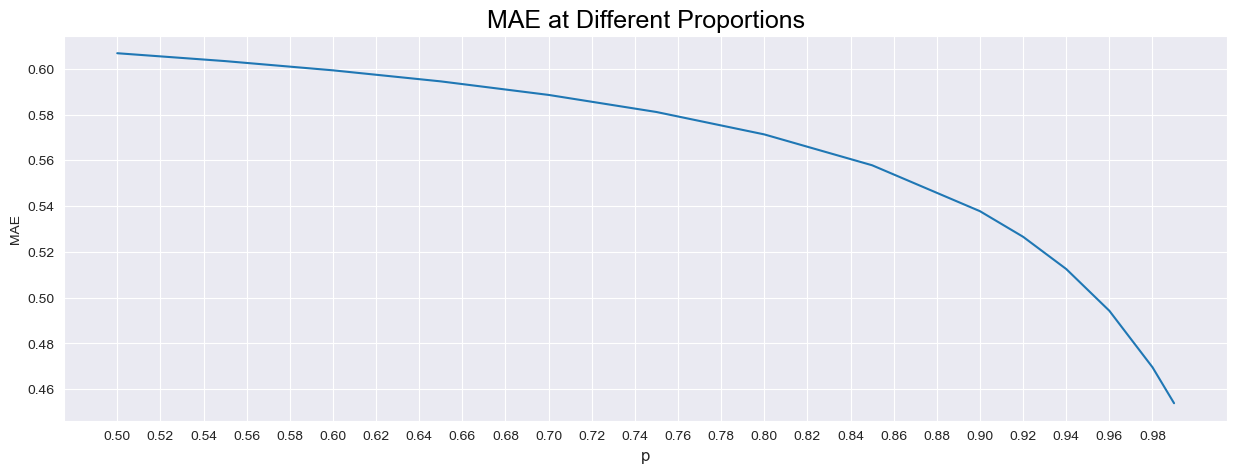

In [128]:
plt.figure(figsize=(15,5))
plt.plot(mae.keys(), mae.values())
plt.xlabel('p', size=12)
plt.ylabel('MAE')
plt.title('MAE at Different Proportions', size=18, color='black')
plt.xticks(np.arange(0.5, 1, step=0.02))
plt.show()

In [2]:
m = pd.read_csv(r'movies_final.csv')
m.head()

,movieId,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
ratings = pd.read_csv(r'ratings.csv')
movies_ratings = pd.merge(m, ratings, on='movieId')
movies_ratings.iloc[:,:-1].head()

,movieId,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary,userId,rating
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,4.0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,5,4.0
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,7,4.5
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,15,2.5
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,17,4.5


In [14]:

rate_values = list(sorted(movies_ratings['rating'].unique()))
value_index_dict = {value:idx for idx,value in enumerate(rate_values)}
movies_ratings[f"{'rating'}_idx"] = movies_ratings['rating'].map(value_index_dict)
movies_ratings.head()

,movieId,year_idx,Action,Comedy,Mystery,Biography,Sci-Fi,War,Animation,Film-Noir,Music,IMAX,Romance,Thriller,Western,Adventure,Fantasy,Children,Horror,Drama,History,Crime,Documentary,userId,rating,timestamp,rating_idx
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,4.0,964982703,7
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,5,4.0,847434962,7
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,7,4.5,1106635946,8
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,15,2.5,1510577970,4
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,17,4.5,1305696483,8


In [15]:
value_index_dict

{0.5: 0,
 1.0: 1,
 1.5: 2,
 2.0: 3,
 2.5: 4,
 3.0: 5,
 3.5: 6,
 4.0: 7,
 4.5: 8,
 5.0: 9}

In [31]:
from sklearn.model_selection import train_test_split
x = movies_ratings.iloc[:,0:23].values
y = movies_ratings.iloc[:,26].values # x为前四列，y为第五列，x为训练数据，y为数据标签
print(x.shape,y.shape)
# x_train,x_test,y_train,y_test = 训练数据，测试数据，训练数据标签，测试数据标签
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2024,test_size=0.2)  # 数据集划分成80%训练集和20%测试集
x_val,x_test,y_val,y_test = train_test_split(x,y,random_state=2024,test_size=0.5)
print(x_train.shape,x_val.shape,x_test.shape)

(100830, 23) (100830,)
(80664, 23) (50415, 23) (50415, 23)


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time

In [21]:
class MultiLayerDNN(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size):
        """
        初始化多隐藏层的深度神经网络
        参数:
            input_size (int): 输入特征的数量
            hidden_sizes (list): 包含每个隐藏层神经元数量的列表
            output_size (int): 输出的类别数量
        """
        super(MultiLayerDNN, self).__init__()

        # 定义第一个隐藏层
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU()
        ])

        # 定义更多的隐藏层
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.ReLU()  # 可以使用其他激活函数，如nn.Sigmoid(), nn.Tanh()
            ])

        # 定义输出层
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
    
    def forward(self, x):
        """
        定义前向传播的过程
        参数:
        x (torch.Tensor): 输入数据
        返回:
            torch.Tensor: 模型的输出
        """
        # 遍历隐藏层并应用线性变换和激活函数
        for layer in self.hidden_layers:
            x = layer(x)

        # 应用输出层的线性变换
        x = self.output_layer(x)

        # 在最后一层输出上应用softmax
        x = F.softmax(x, dim=1)

        return x

In [45]:
# 定义输入、隐藏层和输出的维度
input_size = 23
hidden_sizes = [128, 512]
output_size = 10

In [46]:
# 创建模型实例、损失函数和优化器
device = torch.device("cpu")
model = MultiLayerDNN(input_size, hidden_sizes, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=np.arange(2,100,2),gamma=0.9)
 
# 打印模型结构
print(model)

MultiLayerDNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=23, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=512, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=512, out_features=10, bias=True)
)


In [41]:
input_data = torch.tensor(x_train).float()
target_labels = torch.tensor(y_train).long()
test_data = torch.tensor(x_test).float()
test_labels = torch.tensor(y_test).long()
val_data = torch.tensor(x_val).float()
val_labels = torch.tensor(y_val).long()
# 将数据包装成TensorDataset
train = TensorDataset(input_data, target_labels)
test = TensorDataset(test_data, test_labels)
val = TensorDataset(val_data, val_labels)
# 定义 DataLoader 加载数据
batch_size = 512
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val, shuffle=False)
test_loader = DataLoader(test, shuffle=False)

In [42]:
def train_runner(model, device, trainloader, optimizer, epoch):
    #训练模型, 启用 BatchNormalization 和 Dropout, 将BatchNormalization和Dropout置为True
    model.train()
    total = 0
    correct =0.0

    #enumerate迭代已加载的数据集,同时获取数据和数据下标
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #把模型部署到device上
        inputs, labels = inputs.to(device), labels.to(device)
        #初始化梯度
        optimizer.zero_grad()
        #保存训练结果
        outputs = model(inputs)
        #计算损失和
        loss = criterion(outputs, labels)
        #获取最大概率的预测结果
        #dim=1表示返回每一行的最大值对应的列下标
        predict = outputs.argmax(dim=1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        if i % 100 == 0:
            #loss.item()表示当前loss的数值
            print("Train Epoch{} \n \t Loss: {:.6f}, accuracy: {:.6f}%".format(epoch, loss.item(), 100*(correct/total)))
    return loss.item(), correct/total

In [43]:
def val_runner(model, device, valloader):
    #模型验证, 必须要写, 否则只要有输入数据, 即使不训练, 它也会改变权值
    #因为调用eval()将不启用 BatchNormalization 和 Dropout, BatchNormalization和Dropout置为False
    model.eval()
    #统计模型正确率, 设置初始值
    correct = 0.0
    val_loss = 0.0
    total = 0
    #torch.no_grad将不会计算梯度, 也不会进行反向传播
    with torch.no_grad():
        for data, label in valloader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            val_loss += criterion(output, label).item()
            predict = output.argmax(dim=1)
            #计算正确数量
            total += label.size(0)
            correct += (predict == label).sum().item()
        #计算损失值
        print("\t val_avarage_loss: {:.6f}, accuracy: {:.6f}%".format(val_loss/total, 100*(correct/total)))
    return val_loss/total, correct/total

In [47]:
#调用
epoch = 50
Loss_train = []
Accuracy_train = []
Loss_test = []
Accuracy_test = []
time1 = time.time()
for epoch in range(1, epoch+1):
    loss_t, acc_t = train_runner(model, device, train_loader, optimizer, epoch)
    Loss_train.append(loss_t)
    Accuracy_train.append(acc_t)
    scheduler.step()
    loss_v, acc_v = val_runner(model, device, val_loader)
    Loss_test.append(loss_v)
    Accuracy_test.append(acc_v)
print("cost_time: ",time.time()-time1,'\n')
print('Finished Training') 

Train Epoch1 
 	 Loss: 2.268617, accuracy: 19.335938%
Train Epoch1 
 	 Loss: 2.281463, accuracy: 19.906405%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch2 
 	 Loss: 2.299042, accuracy: 16.210938%
Train Epoch2 
 	 Loss: 2.258026, accuracy: 19.807782%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch3 
 	 Loss: 2.240448, accuracy: 22.070312%
Train Epoch3 
 	 Loss: 2.258026, accuracy: 19.550588%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch4 
 	 Loss: 2.269745, accuracy: 19.140625%
Train Epoch4 
 	 Loss: 2.242401, accuracy: 20.097850%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch5 
 	 Loss: 2.271698, accuracy: 18.945312%
Train Epoch5 
 	 Loss: 2.250213, accuracy: 19.867729%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch6 
 	 Loss: 2.263885, accuracy: 19.726562%
Train Epoch6 
 	 Loss: 2.271698, accuracy: 19.910272%
	 val_avarage_loss: 2.262281, accuracy: 19.886938%
Train Epoch7 
 	 Loss: 2.302948, accuracy: 15.

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Loss_train, '--', label = 'train_Loss')
plt.plot(Loss_test, '--', label = 'val_Loss')
plt.plot(Accuracy_train,label = 'train_acc')
plt.plot(Accuracy_test, label = 'val_acc')
plt.title('Loss and Accuracy', size=18)
plt.xlabel('Epoch', size=12)
plt.ylabel('value', size=12)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
#plt.tight_layout()
plt.show() #ModelB2结果可视化